In [93]:
# import things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load some data
data = pd.read_csv('pl_2024.csv')

In [94]:
# check data is good
data.sample(2)
#print(data.isnull().sum().sort_values(ascending=False).head(10))  # Top nulls
#print(data.duplicated().sum())
#print(data[["HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR"]].sample(5))
columns_to_check = [
    "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR",
    "HF", "AF", "HS", "AS", "HY", "AY"
]
null_summary = data[columns_to_check].isna().sum().sort_values(ascending=False)
null_summary

HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HF          0
AF          0
HS          0
AS          0
HY          0
AY          0
dtype: int64

In [95]:
# let's begin by generating the final premier league table for 2024 season. 
teams = pd.concat([data["HomeTeam"], data["AwayTeam"]]).unique()
table = pd.DataFrame(0, index=teams, columns=["P", "W", "D", "L", "GF", "GA", "GD", "Pts"])
for _, row in data.iterrows():
    home, away = row["HomeTeam"], row["AwayTeam"]
    hg, ag = row["FTHG"], row["FTAG"]
    result = row["FTR"]

    # Home stats
    table.loc[home, "P"] += 1
    table.loc[home, "GF"] += hg
    table.loc[home, "GA"] += ag
    if result == "H":
        table.loc[home, "W"] += 1
        table.loc[home, "Pts"] += 3
    elif result == "D":
        table.loc[home, "D"] += 1
        table.loc[home, "Pts"] += 1
    else:
        table.loc[home, "L"] += 1
        

    # Away stats
    table.loc[away, "P"] += 1
    table.loc[away, "GF"] += ag
    table.loc[away, "GA"] += hg
    if result == "A":
        table.loc[away, "W"] += 1
        table.loc[away, "Pts"] += 3
    elif result == "D":
        table.loc[away, "D"] += 1
        table.loc[away, "Pts"] += 1
    else:
        table.loc[away, "L"] += 1



# Goal difference
table["GD"] = table["GF"] - table["GA"]

# Sort
final_table = table.sort_values(by=["Pts", "GD", "GF"], ascending=False).astype(int)

print(final_table)


                 P   W   D   L  GF  GA  GD  Pts
Liverpool       38  25   9   4  86  41  45   84
Arsenal         38  20  14   4  69  34  35   74
Man City        38  21   8   9  72  44  28   71
Chelsea         38  20   9   9  64  43  21   69
Newcastle       38  20   6  12  68  47  21   66
Aston Villa     38  19   9  10  58  51   7   66
Nott'm Forest   38  19   8  11  58  46  12   65
Brighton        38  16  13   9  66  59   7   61
Bournemouth     38  15  11  12  58  46  12   56
Brentford       38  16   8  14  66  57   9   56
Fulham          38  15   9  14  54  54   0   54
Crystal Palace  38  13  14  11  51  51   0   53
Everton         38  11  15  12  42  44  -2   48
West Ham        38  11  10  17  46  62 -16   43
Man United      38  11   9  18  44  54 -10   42
Wolves          38  12   6  20  54  69 -15   42
Tottenham       38  11   5  22  64  65  -1   38
Leicester       38   6   7  25  33  80 -47   25
Ipswich         38   4  10  24  36  82 -46   22
Southampton     38   2   6  30  26  86 -

## First Steps

The first step is simply to replicate the final premier league table. And this is it. Looks great.. Checked the numbers and they are all on. 

But We can do something more interesting, so let's get onto that. 

In [96]:
# Initialize table
teams = pd.concat([data["HomeTeam"], data["AwayTeam"]]).unique()
table = pd.DataFrame(0, index=teams, columns=[
    "P", "W", "D", "L", "GF", "GA", "GD", "Pts",
    "HomeGoals", "AwayGoals", "TotalFouls", "TotalShots", "TotalYellows", "H.Vs.A Goals"
])

for _, row in data.iterrows():
    home, away = row["HomeTeam"], row["AwayTeam"]
    hg, ag = row["FTHG"], row["FTAG"]
    result = row["FTR"]

    # Update core stats
    table.loc[home, ["P", "GF", "GA", "HomeGoals"]] += [1, hg, ag, hg]
    table.loc[away, ["P", "GF", "GA", "AwayGoals"]] += [1, ag, hg, ag]

    if result == "H":
        table.loc[home, "W"] += 1
        table.loc[home, "Pts"] += 3
        table.loc[away, "L"] += 1
    elif result == "D":
        table.loc[home, "D"] += 1
        table.loc[away, "D"] += 1
        table.loc[[home, away], "Pts"] += 1
    else:
        table.loc[away, "W"] += 1
        table.loc[away, "Pts"] += 3
        table.loc[home, "L"] += 1

    # Fouls
    table.loc[home, "TotalFouls"] += row.get("HF", 0)
    table.loc[away, "TotalFouls"] += row.get("AF", 0)

    # Shots
    table.loc[home, "TotalShots"] += row.get("HS", 0)
    table.loc[away, "TotalShots"] += row.get("AS", 0)

    # Yellow cards
    table.loc[home, "TotalYellows"] += row.get("HY", 0)
    table.loc[away, "TotalYellows"] += row.get("AY", 0)

# Goal difference
table["GD"] = table["GF"] - table["GA"]

# Home vs Away goal diff
table["H.Vs.A Goals"] = table["HomeGoals"] - table["AwayGoals"]

# Clean up
final_table = table.sort_values(by=["Pts", "GD", "GF"], ascending=False).astype(int)

display(final_table)

,P,W,D,L,GF,GA,GD,Pts,HomeGoals,AwayGoals,TotalFouls,TotalShots,TotalYellows,H.Vs.A Goals
Liverpool,38,25,9,4,86,41,45,84,42,44,430,648,64,-2
Arsenal,38,20,14,4,69,34,35,74,35,34,400,547,64,1
Man City,38,21,8,9,72,44,28,71,43,29,287,607,57,14
Chelsea,38,20,9,9,64,43,21,69,35,29,436,595,98,6
Newcastle,38,20,6,12,68,47,21,66,40,28,394,524,68,12
Aston Villa,38,19,9,10,58,51,7,66,34,24,406,484,72,10
Nott'm Forest,38,19,8,11,58,46,12,65,26,32,391,463,85,-6
Brighton,38,16,13,9,66,59,7,61,30,36,438,533,72,-6
Bournemouth,38,15,11,12,58,46,12,56,23,35,514,580,97,-12
Brentford,38,16,8,14,66,57,9,56,40,26,319,441,62,14


## Added Complexity. 

Here we are able to add totals for fouls, shots and yellows to see where each team ended up. We also added home goals and away goals and saw how they performed. Interesting to see that Liverpool, title winners, actually ended up negative, performing better away from home. 

Another element I notice is that Chelsea and Liverpool have a similar amount of total fouls, but Chelsea gather almost an additional 34 yellow cards. That's over 50% more than Liverpool did. 

In [97]:
# final table is going to have winning and winless streaks
from collections import defaultdict

# === Your Original Table Logic ===
teams = pd.concat([data["HomeTeam"], data["AwayTeam"]]).unique()
table = pd.DataFrame(0, index=teams, columns=[
    "P", "W", "D", "L", "GF", "GA", "GD", "Pts",
    "HomeGoals", "AwayGoals", "TotalFouls", "TotalShots", "TotalYellows", "H.Vs.A Goals"
])

for _, row in data.iterrows():
    home, away = row["HomeTeam"], row["AwayTeam"]
    hg, ag = row["FTHG"], row["FTAG"]
    result = row["FTR"]

    table.loc[home, ["P", "GF", "GA", "HomeGoals"]] += [1, hg, ag, hg]
    table.loc[away, ["P", "GF", "GA", "AwayGoals"]] += [1, ag, hg, ag]

    if result == "H":
        table.loc[home, "W"] += 1
        table.loc[home, "Pts"] += 3
        table.loc[away, "L"] += 1
    elif result == "D":
        table.loc[home, "D"] += 1
        table.loc[away, "D"] += 1
        table.loc[[home, away], "Pts"] += 1
    else:
        table.loc[away, "W"] += 1
        table.loc[away, "Pts"] += 3
        table.loc[home, "L"] += 1

    table.loc[home, "TotalFouls"] += row.get("HF", 0)
    table.loc[away, "TotalFouls"] += row.get("AF", 0)
    table.loc[home, "TotalShots"] += row.get("HS", 0)
    table.loc[away, "TotalShots"] += row.get("AS", 0)
    table.loc[home, "TotalYellows"] += row.get("HY", 0)
    table.loc[away, "TotalYellows"] += row.get("AY", 0)

table["GD"] = table["GF"] - table["GA"]
table["H.Vs.A Goals"] = table["HomeGoals"] - table["AwayGoals"]

# === Add Streaks ===
# Sort matches chronologically
data_sorted = data.sort_values("Date")
team_results = defaultdict(list)

for _, row in data_sorted.iterrows():
    home, away, result = row["HomeTeam"], row["AwayTeam"], row["FTR"]
    team_results[home].append("W" if result == "H" else "D" if result == "D" else "L")
    team_results[away].append("W" if result == "A" else "D" if result == "D" else "L")

def get_streak(seq, win=True):
    best = count = 0
    for res in seq:
        if (win and res == "W") or (not win and res != "W"):
            count += 1
            best = max(best, count)
        else:
            count = 0
    return best

# Compute and assign streaks
table["WinStreak"] = [get_streak(team_results[team], win=True) for team in table.index]
table["NoWinStreak"] = [get_streak(team_results[team], win=False) for team in table.index]

# Final table sort and cast
final_table = table.sort_values(by=["Pts", "GD", "GF"], ascending=False).astype(int)

display(final_table)


,P,W,D,L,GF,GA,GD,Pts,HomeGoals,AwayGoals,TotalFouls,TotalShots,TotalYellows,H.Vs.A Goals,WinStreak,NoWinStreak
Liverpool,38,25,9,4,86,41,45,84,42,44,430,648,64,-2,7,3
Arsenal,38,20,14,4,69,34,35,74,35,34,400,547,64,1,5,6
Man City,38,21,8,9,72,44,28,71,43,29,287,607,57,14,5,5
Chelsea,38,20,9,9,64,43,21,69,35,29,436,595,98,6,4,5
Newcastle,38,20,6,12,68,47,21,66,40,28,394,524,68,12,6,5
Aston Villa,38,19,9,10,58,51,7,66,34,24,406,484,72,10,5,10
Nott'm Forest,38,19,8,11,58,46,12,65,26,32,391,463,85,-6,5,4
Brighton,38,16,13,9,66,59,7,61,30,36,438,533,72,-6,3,7
Bournemouth,38,15,11,12,58,46,12,56,23,35,514,580,97,-12,3,5
Brentford,38,16,8,14,66,57,9,56,40,26,319,441,62,14,2,5


## Even More Complexity

Finally, I decided to look at best winstreaks and worse winless(Games with no wins in a row) to see if going on "runs" is important. 

It sees so, in general higher win streaks indicate better final position, but by no means, definitive. The NoWinStreak seems to correlate better, but perhaps a no loss streak would be more informative. 

In [98]:
def sort_final_table(by: str = "Pts", ascending: bool = False):
    """
    Return the league table sorted by any column.
    
    Args:
        by (str): Column name to sort by.
        ascending (bool): Sort order; use True for ascending.

    Returns:
        pd.DataFrame: Sorted league table.
    """
    if by not in final_table.columns:
        raise ValueError(f"Column '{by}' not found in table.")

    return final_table.sort_values(by=by, ascending=ascending)

def style_final_table(df, color_by="Pts"):
    styled = (
        df.style
        .background_gradient(subset=[color_by], cmap="RdYlGn", axis=0)
        .format("{:.0f}")
        .set_caption("Premier League 2024 Final Table")
        .set_table_styles([
            {"selector": "th.row_heading", "props": [("font-size", "14pt"), ("font-weight", "bold"), ("color", "#D7BC37")]},
            {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "16pt"), ("font-weight", "bold")]}
        ])
    )
    return styled


In [99]:
display(style_final_table(sort_final_table(by="WinStreak"), color_by="Pts"))

,P,W,D,L,GF,GA,GD,Pts,HomeGoals,AwayGoals,TotalFouls,TotalShots,TotalYellows,H.Vs.A Goals,WinStreak,NoWinStreak
Liverpool,38,25,9,4,86,41,45,84,42,44,430,648,64,-2,7,3
Newcastle,38,20,6,12,68,47,21,66,40,28,394,524,68,12,6,5
Man City,38,21,8,9,72,44,28,71,43,29,287,607,57,14,5,5
Arsenal,38,20,14,4,69,34,35,74,35,34,400,547,64,1,5,6
Nott'm Forest,38,19,8,11,58,46,12,65,26,32,391,463,85,-6,5,4
Aston Villa,38,19,9,10,58,51,7,66,34,24,406,484,72,10,5,10
Chelsea,38,20,9,9,64,43,21,69,35,29,436,595,98,6,4,5
West Ham,38,11,10,17,46,62,-16,43,23,23,443,476,78,0,4,11
Bournemouth,38,15,11,12,58,46,12,56,23,35,514,580,97,-12,3,5
Wolves,38,12,6,20,54,69,-15,42,27,27,480,431,74,0,3,4


## Stylin' The Table

For visual clarity I decided to add a way that we can visualise the table and see which team ended up where according to different metrics. This one for example, appears to show a pretty accurate table based on Winstreak. We can change this in a multitude of ways to see how important they are. 

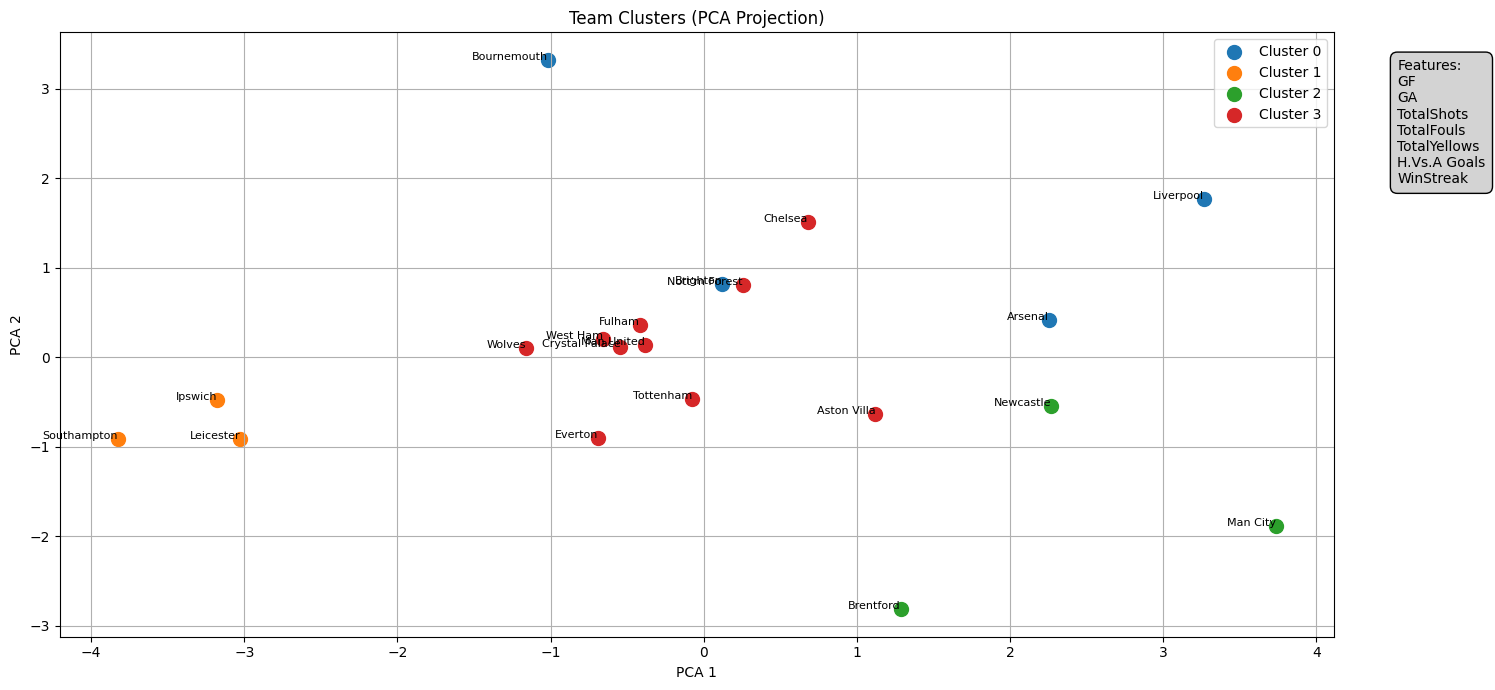

In [100]:
# let's try visualise a clustering of team statistics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Step 1: Extract features
features = ["GF", "GA", "TotalShots", "TotalFouls", "TotalYellows", "H.Vs.A Goals", "WinStreak"]
X = final_table[features].copy()

# Step 2: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
final_table["Cluster"] = kmeans.fit_predict(X_scaled)

# Step 4: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(15, 7))
for i in range(4):
    ix = final_table["Cluster"] == i
    plt.scatter(X_pca[ix, 0], X_pca[ix, 1], label=f"Cluster {i}", s=100)

for i, team in enumerate(final_table.index):
    plt.text(X_pca[i, 0], X_pca[i, 1], team, fontsize=8, ha='right')

plt.title("Team Clusters (PCA Projection)")
plt.text(
    1.05, .75,
    "Features:\n" + "\n".join(features),
    fontsize=10,
    transform=plt.gca().transAxes,
    bbox=dict(boxstyle="round,pad=0.5", fc="lightgrey", ec="black", lw=1)
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Clusetering Performers Together. 

Clustering is a really intersting techique which often produces interesting results. We can see some interesting trends, but it does require some breaking down: 

#### 🔵 Cluster 0 – Balanced Performers
Teams: Liverpool, Arsenal, Bournemouth

Strong attack + win streaks

Liverpool isolated as a top performer

#### 🟠 Cluster 1 – Struggling Zone
Teams: Southampton, Leicester, Ipswich

Weak on most metrics

Low scoring, short win streaks

Likely relegation zone

#### 🟢 Cluster 2 – Efficient Elite
Teams: Man City, Brentford, Newcastle

High-performing, strong win streaks

Clean and effective playstyles

Man City is a statistical outlier

#### 🔴 Cluster 3 – Mid-Table Mix
Teams: Chelsea, Spurs, Villa, Fulham, etc.

Mixed or inconsistent performances

Moderate streaks, scattered stats

Typical mid-table variance



In [102]:
display(style_final_table(sort_final_table(by="Pts"), color_by="Cluster"))


,P,W,D,L,GF,GA,GD,Pts,HomeGoals,AwayGoals,TotalFouls,TotalShots,TotalYellows,H.Vs.A Goals,WinStreak,NoWinStreak,Cluster
Liverpool,38,25,9,4,86,41,45,84,42,44,430,648,64,-2,7,3,0
Arsenal,38,20,14,4,69,34,35,74,35,34,400,547,64,1,5,6,0
Man City,38,21,8,9,72,44,28,71,43,29,287,607,57,14,5,5,2
Chelsea,38,20,9,9,64,43,21,69,35,29,436,595,98,6,4,5,3
Newcastle,38,20,6,12,68,47,21,66,40,28,394,524,68,12,6,5,2
Aston Villa,38,19,9,10,58,51,7,66,34,24,406,484,72,10,5,10,3
Nott'm Forest,38,19,8,11,58,46,12,65,26,32,391,463,85,-6,5,4,3
Brighton,38,16,13,9,66,59,7,61,30,36,438,533,72,-6,3,7,0
Bournemouth,38,15,11,12,58,46,12,56,23,35,514,580,97,-12,3,5,0
Brentford,38,16,8,14,66,57,9,56,40,26,319,441,62,14,2,5,2


## What We Learned
- Built a full league table with added metrics: shots, fouls, yellow cards, home/away goals
- Calculated longest win streaks and winless runs for each team
- Used clustering (KMeans + PCA) to group teams by playing style and performance

## Key Insights
- Teams with similar points can have very different profiles (e.g. disciplined vs aggressive)
- Some mid-table teams had elite-level win streaks but lacked consistency
- Clustering revealed patterns in how teams play, not just where they finished

## Further Analysis Idea
Build a match outcome predictor using team features like shots, goals, discipline, and streaks — to estimate win probabilities or momentum